In [1]:
import pandas as pd
from prophet import Prophet
import itertools
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

In [179]:
data = yf.download(tickers='IRCTC.NS', period='1d', interval='5m')
data.to_csv("IRCTC.csv")

[*********************100%***********************]  1 of 1 completed


In [7]:
df_temp=pd.read_csv("TATACHEMok.csv")


df_temp.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1433,2021-10-05 11:15:00+05:30,939.700012,942.900024,937.049988,937.650024,937.650024,398447
1434,2021-10-05 12:15:00+05:30,937.599976,939.950012,934.049988,937.700012,937.700012,308041
1435,2021-10-05 13:15:00+05:30,937.700012,939.450012,934.000000,936.849976,936.849976,334667
1436,2021-10-05 14:15:00+05:30,936.900024,938.750000,928.599976,930.099976,930.099976,413500
1437,2021-10-05 15:15:00+05:30,930.250000,934.000000,929.799988,932.000000,932.000000,245542


In [8]:

#df_temp = pd.read_csv("IRCTC.csv")

In [9]:
df_temp

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2020-12-07 09:15:00+05:30,505.000000,526.900024,499.549988,520.000000,520.000000,0
1,2020-12-07 10:15:00+05:30,520.200012,521.799988,509.100006,512.349976,512.349976,5240496
2,2020-12-07 11:15:00+05:30,511.350006,515.250000,507.549988,513.000000,513.000000,3758207
3,2020-12-07 12:15:00+05:30,513.000000,513.799988,510.549988,512.299988,512.299988,1206479
4,2020-12-07 13:15:00+05:30,512.349976,515.400024,509.750000,514.450012,514.450012,1986526
...,...,...,...,...,...,...,...
1433,2021-10-05 11:15:00+05:30,939.700012,942.900024,937.049988,937.650024,937.650024,398447
1434,2021-10-05 12:15:00+05:30,937.599976,939.950012,934.049988,937.700012,937.700012,308041
1435,2021-10-05 13:15:00+05:30,937.700012,939.450012,934.000000,936.849976,936.849976,334667
1436,2021-10-05 14:15:00+05:30,936.900024,938.750000,928.599976,930.099976,930.099976,413500


In [10]:

df=df_temp[["Datetime","Close"]]


In [11]:
df[20:]

,Datetime,Close
20,2020-12-09 15:15:00+05:30,511.000000
21,2020-12-10 09:15:00+05:30,504.149994
22,2020-12-10 10:15:00+05:30,508.899994
23,2020-12-10 11:15:00+05:30,508.450012
24,2020-12-10 12:15:00+05:30,507.000000
...,...,...
1433,2021-10-05 11:15:00+05:30,937.650024
1434,2021-10-05 12:15:00+05:30,937.700012
1435,2021-10-05 13:15:00+05:30,936.849976
1436,2021-10-05 14:15:00+05:30,930.099976


In [12]:
df

,Datetime,Close
0,2020-12-07 09:15:00+05:30,520.000000
1,2020-12-07 10:15:00+05:30,512.349976
2,2020-12-07 11:15:00+05:30,513.000000
3,2020-12-07 12:15:00+05:30,512.299988
4,2020-12-07 13:15:00+05:30,514.450012
...,...,...
1433,2021-10-05 11:15:00+05:30,937.650024
1434,2021-10-05 12:15:00+05:30,937.700012
1435,2021-10-05 13:15:00+05:30,936.849976
1436,2021-10-05 14:15:00+05:30,930.099976


In [13]:
date = pd.read_csv("date.csv")
df["Datetime"] = date["Date"]

<ipython-input-13-6d58ee315ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Datetime"] = date["Date"]


In [14]:
df

,Datetime,Close
0,9/23/2020,520.000000
1,9/24/2020,512.349976
2,9/25/2020,513.000000
3,9/26/2020,512.299988
4,9/27/2020,514.450012
...,...,...
1433,8/26/2024,937.650024
1434,8/27/2024,937.700012
1435,8/28/2024,936.849976
1436,8/29/2024,930.099976


In [15]:
df.dtypes

Datetime     object
Close       float64
dtype: object

In [16]:
#df["Datetime"]=pd.to_datetime(df["Datetime"])

In [17]:
df.dtypes

Datetime     object
Close       float64
dtype: object

In [18]:
df.columns=['ds','y']

In [19]:
df[-20:]

,ds,y
1418,8/11/2024,914.150024
1419,8/12/2024,911.549988
1420,8/13/2024,911.599976
1421,8/14/2024,914.250000
1422,8/15/2024,911.000000
1423,8/16/2024,910.400024
1424,8/17/2024,918.000000
1425,8/18/2024,916.750000
1426,8/19/2024,913.000000
1427,8/20/2024,914.549988


In [20]:
m= Prophet(interval_width=0.9,daily_seasonality=True)
model = m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [21]:
future = m.make_future_dataframe(periods=271,freq='D')
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-23,517.577245,479.723614,534.897137,517.577245,517.577245,-9.084013,-9.084013,-9.084013,7.118888,...,-0.450757,-0.450757,-0.450757,-15.752144,-15.752144,-15.752144,0.0,0.0,0.0,508.493231
1,2020-09-24,516.520481,478.736597,535.092279,516.520481,516.520481,-8.756424,-8.756424,-8.756424,7.118888,...,-0.510994,-0.510994,-0.510994,-15.364318,-15.364318,-15.364318,0.0,0.0,0.0,507.764058
2,2020-09-25,515.463718,480.060609,534.063230,515.463718,515.463718,-8.770644,-8.770644,-8.770644,7.118888,...,-0.926980,-0.926980,-0.926980,-14.962552,-14.962552,-14.962552,0.0,0.0,0.0,506.693074
3,2020-09-26,514.406954,478.321806,534.937189,514.406954,514.406954,-6.274389,-6.274389,-6.274389,7.118888,...,1.140299,1.140299,1.140299,-14.533576,-14.533576,-14.533576,0.0,0.0,0.0,508.132566
4,2020-09-27,513.350191,479.599504,535.186633,513.350191,513.350191,-6.234476,-6.234476,-6.234476,7.118888,...,0.710311,0.710311,0.710311,-14.063676,-14.063676,-14.063676,0.0,0.0,0.0,507.115715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2025-05-24,1040.631923,642.246530,1356.154016,670.457940,1390.504612,-26.862199,-26.862199,-26.862199,7.118888,...,1.140299,1.140299,1.140299,-35.121385,-35.121385,-35.121385,0.0,0.0,0.0,1013.769725
1705,2025-05-25,1041.106102,637.676919,1361.677478,668.554735,1393.036780,-27.351942,-27.351942,-27.351942,7.118888,...,0.710311,0.710311,0.710311,-35.181141,-35.181141,-35.181141,0.0,0.0,0.0,1013.754160
1706,2025-05-26,1041.580280,631.065623,1367.564927,666.651531,1395.530879,-27.768723,-27.768723,-27.768723,7.118888,...,0.399983,0.399983,0.399983,-35.287594,-35.287594,-35.287594,0.0,0.0,0.0,1013.811557
1707,2025-05-27,1042.054459,630.123298,1368.134571,664.748326,1397.989849,-28.700538,-28.700538,-28.700538,7.118888,...,-0.361863,-0.361863,-0.361863,-35.457563,-35.457563,-35.457563,0.0,0.0,0.0,1013.353921


In [22]:
print(forecast[["ds","yhat"]][-25:])
print(df[-10:])
forecast.dtypes
df.dtypes

             ds         yhat
1684 2025-05-04  1017.304117
1685 2025-05-05  1016.069551
1686 2025-05-06  1014.396019
1687 2025-05-07  1013.428585
1688 2025-05-08  1012.542418
1689 2025-05-09  1011.370879
1690 2025-05-10  1012.768554
1691 2025-05-11  1011.767838
1692 2025-05-12  1010.995572
1693 2025-05-13  1009.887209
1694 2025-05-14  1009.570380
1695 2025-05-15  1009.400408
1696 2025-05-16  1008.988982
1697 2025-05-17  1011.167831
1698 2025-05-18  1010.945984
1699 2025-05-19  1010.927099
1700 2025-05-20  1010.524323
1701 2025-05-21  1010.844519
1702 2025-05-22  1011.224405
1703 2025-05-23  1011.259790
1704 2025-05-24  1013.769725
1705 2025-05-25  1013.754160
1706 2025-05-26  1013.811557
1707 2025-05-27  1013.353921
1708 2025-05-28  1013.491088
             ds           y
1428  8/21/2024  911.700012
1429  8/22/2024  932.599976
1430  8/23/2024  935.750000
1431  8/24/2024  940.000000
1432  8/25/2024  939.849976
1433  8/26/2024  937.650024
1434  8/27/2024  937.700012
1435  8/28/2024  936.8

ds     object
y     float64
dtype: object

In [23]:
se = np.square(forecast.loc[:, 'yhat'] - df["y"])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse


16.81727793232686

In [24]:
mse

282.820837053128

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
mse = mean_squared_error(df['y'], forecast.loc[:, 'yhat'][:-271])
mae = mean_absolute_error(df['y'], forecast.loc[:, 'yhat'][:-271])
r2 = r2_score(df['y'], forecast.loc[:, 'yhat'][:-271])

In [27]:
mse
rmse

16.81727793232686

In [28]:
mae

13.27282474524247

In [29]:
r2

0.9819457993292078

In [33]:
forecast[-271:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1438,2024-08-31,914.500421,871.970067,927.193503,914.500421,914.500421,-13.837251,-13.837251,-13.837251,7.118888,...,1.140299,1.140299,1.140299,-22.096438,-22.096438,-22.096438,0.0,0.0,0.0,900.663170
1439,2024-09-01,914.974599,872.567847,928.618111,914.974599,914.974599,-14.942201,-14.942201,-14.942201,7.118888,...,0.710311,0.710311,0.710311,-22.771400,-22.771400,-22.771400,0.0,0.0,0.0,900.032399
1440,2024-09-02,915.448778,873.657942,927.406695,915.448778,915.448778,-15.755993,-15.755993,-15.755993,7.118888,...,0.399983,0.399983,0.399983,-23.274864,-23.274864,-23.274864,0.0,0.0,0.0,899.692785
1441,2024-09-03,915.922957,870.843609,928.792900,915.922957,915.922957,-16.854605,-16.854605,-16.854605,7.118888,...,-0.361863,-0.361863,-0.361863,-23.611630,-23.611630,-23.611630,0.0,0.0,0.0,899.068352
1442,2024-09-04,916.397135,872.632935,925.766285,916.397135,916.397135,-17.121511,-17.121511,-17.121511,7.118888,...,-0.450757,-0.450757,-0.450757,-23.789642,-23.789642,-23.789642,0.0,0.0,0.0,899.275624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2025-05-24,1040.631923,642.246530,1356.154016,670.457940,1390.504612,-26.862199,-26.862199,-26.862199,7.118888,...,1.140299,1.140299,1.140299,-35.121385,-35.121385,-35.121385,0.0,0.0,0.0,1013.769725
1705,2025-05-25,1041.106102,637.676919,1361.677478,668.554735,1393.036780,-27.351942,-27.351942,-27.351942,7.118888,...,0.710311,0.710311,0.710311,-35.181141,-35.181141,-35.181141,0.0,0.0,0.0,1013.754160
1706,2025-05-26,1041.580280,631.065623,1367.564927,666.651531,1395.530879,-27.768723,-27.768723,-27.768723,7.118888,...,0.399983,0.399983,0.399983,-35.287594,-35.287594,-35.287594,0.0,0.0,0.0,1013.811557
1707,2025-05-27,1042.054459,630.123298,1368.134571,664.748326,1397.989849,-28.700538,-28.700538,-28.700538,7.118888,...,-0.361863,-0.361863,-0.361863,-35.457563,-35.457563,-35.457563,0.0,0.0,0.0,1013.353921


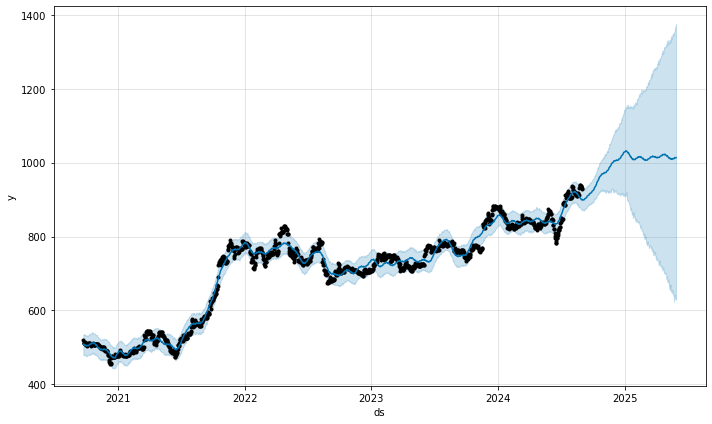

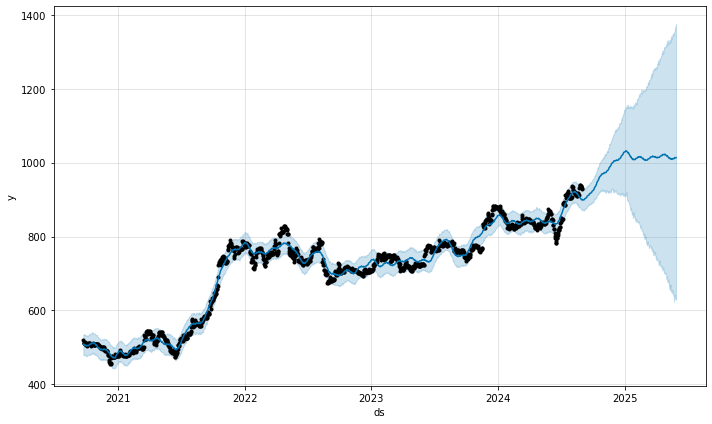

In [31]:
m.plot(forecast)

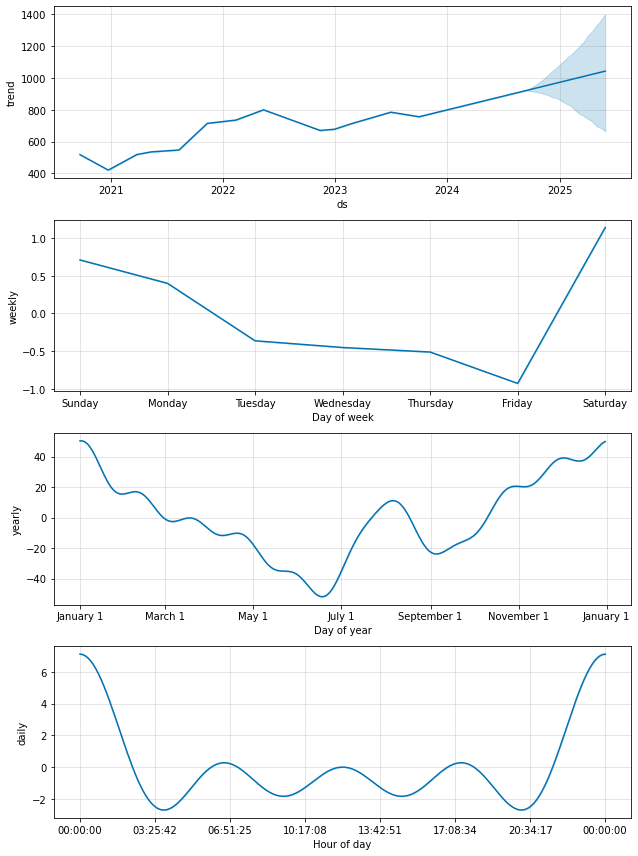

In [32]:
plot2 = m.plot_components(forecast)